In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("HAM10000_metadata.csv")
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [20]:
data_encoded = pd.get_dummies(data, columns=['dx'])
data_encoded

,lesion_id,image_id,dx_type,age,sex,localization,dx_akiec,dx_bcc,dx_bkl,dx_df,dx_mel,dx_nv,dx_vasc
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,0,0,1,0,0,0,0
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,0,0,1,0,0,0,0
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,0,0,1,0,0,0,0
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,0,0,1,0,0,0,0
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,histo,40.0,male,abdomen,1,0,0,0,0,0,0
10011,HAM_0002867,ISIC_0033550,histo,40.0,male,abdomen,1,0,0,0,0,0,0
10012,HAM_0002867,ISIC_0033536,histo,40.0,male,abdomen,1,0,0,0,0,0,0
10013,HAM_0000239,ISIC_0032854,histo,80.0,male,face,1,0,0,0,0,0,0


In [4]:
import statistics
m = statistics.mean(data['age'].values)
m

nan

In [5]:
missing_values = data['age'].isna().sum()
print(f"Number of missing values in 'age' column: {missing_values}")

Number of missing values in 'age' column: 57


In [6]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [7]:
import statistics
m = statistics.mean(data['age'].values)
m

51.863828077927295

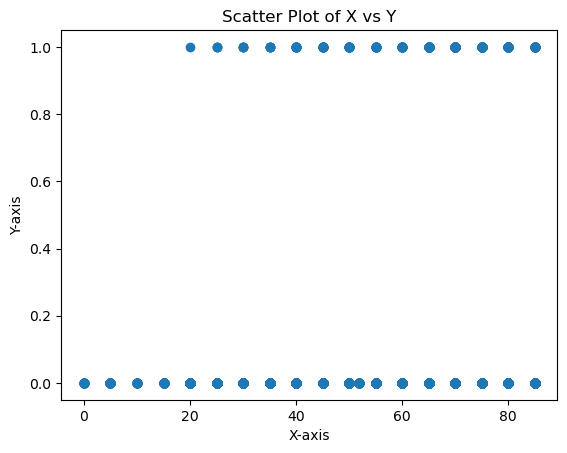

In [22]:
import matplotlib.pyplot as plt
x = data_encoded['age']
y = data_encoded['dx_bcc']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X vs Y')

# Show the plot
plt.show()


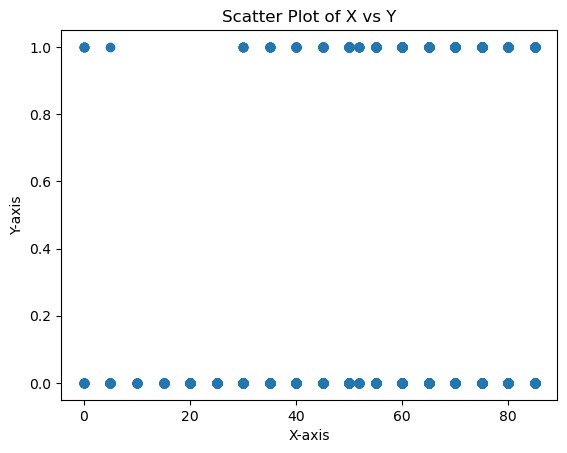

In [23]:
x = data_encoded['age']
y = data_encoded['dx_bkl']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X vs Y')

# Show the plot
plt.show()


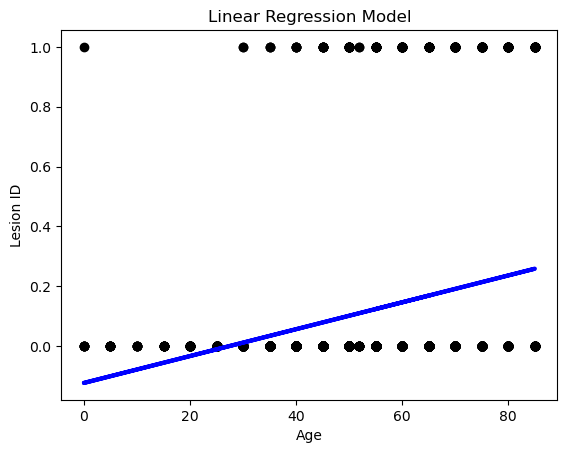

Mean Squared Error: 0.09


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = data_encoded['age'].values.reshape(-1, 1)
y = data_encoded['dx_bkl'].values

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions and calculate the MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Visualize the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Lesion ID')
plt.title('Linear Regression Model')
plt.show()

print(f'Mean Squared Error: {mse:.2f}')


In [13]:
import os
from tensorflow.keras.utils import to_categorical

base = "D:\BTECH\BTECH_SEM5\Machine Learning\Project"

df=pd.read_csv(os.path.join(base,'hmnist_8_8_RGB.csv'))
x=df.drop('label',axis=1)
y=df['label']
x=x.to_numpy()
x=x/255
y=to_categorical(y)

In [15]:
pip install Pillow